# R: Introducción y estructuras de datos

**Profesores:**  
Rodrigo Manzanas (rmanzanas@ifca.unican.es)  
Catharina Graafland (catharina.graafland@unican.es)  

## ¿Qué es R?

* En 1976, John Chambers, Rick Becker y Allan Wilks desarrollaron *S* como un conjunto de macros Fortran, que se convirtieron en el entorno de análisis estadístico de Bell Labs.
* En 1988, se reescribió completamente S (S3) en código C. Diez años más tarde, en 1998, se lanzó la S4, que contenía un conjunto de características orientadas a objetos más avanzadas que las de S3. S4 (y su versión comercial S-Plus) siguen estando vigentes en la actualidad.
* En pocas palabras, R es un dialecto libre del lenguaje S, desarrollado en 1993 por Robert Gentleman y Ross Ihaka del departamento de Estadística de la Universidad de Auckland.
* Con más de 2 millones de usuarios a nivel mundial, R se ha convertido rápidamente en el lenguaje de programación líder en estadística y ciencia de datos. Cada año, el número de usuarios de R crece en un 40%, y cada vez más organizaciones lo están usando para sus actividades cotidianas. Sus características básicas son:
  + software libre de código abierto -> desarrolladores de todo el mundo contribuyen con paquetes que permiten realizar análisis cada vez más específicos y sofisticados. No hay limitaciones.   
  + está en constante evolución y se dispone de una amplia documentación. Hay mucha información disponible en foros como Stackoverflow.
  + gran capacidad de gráficos para visualizar información compleja de una forma sencilla. 
  + muy flexible, puede trabajar con datos procedentes de todo tipo de archivos: .txt, .csv, JSON, etc.
* Existen múltiples guías para el aprendizaje y uso de R. Algunas de las más populares son las siguientes:
  + "Introduccion a R": http://cran.r-project.org/doc/contrib/R-intro-1.1.0-espanol.1.pdf
  + "R para principiantes": https://cran.r-project.org/doc/contrib/rdebuts_es.pdf
  + "The R book": ftp://ftp.tuebingen.mpg.de/pub/kyb/bresciani/Crawley%20-%20The%20R%20Book.pdf

## Primeros pasos con R

* Instalación:
 + Desde la paǵina de CRAN (Comprehensive R Archive Network): https://cran.r-project.org/mirrors.html. CRAN es el repositorio oficial de R (y la mayoría de sus paquetes), el cual es coordinado por la "R foundation" y mantenido por la comunidad de usuarios de R en todo el mundo. En Ubuntu y otras distribuciones Linux suele bastar con ejecutar `sudo apt-get install r-base`
   + Suele publicarse una nueva versión de R cada seis meses. Es conveniente utilizar siempre la última versión.
* R es un lenguaje de programación orientado a objetos, muy similar en sintaxis a C y C++. Todo en R son objetos: un valor numérico es un objeto, un vector es un objeto, una función es un objeto, una base de datos es un objeto, un gráfico es un objeto... Entre otras cosas, esto significa que una misma función puede hacer cosas distintas según la clase del objeto que recibe como argumento, pudiendo incluso no hacer nada (o producir un error) si se le pasan argumentos de una clase inadecuada.
* El nombre de un objeto de R puede ser cualquier cadena alfanumérica formada por letras (R distingue entre mayúsculas y minúsculas), dígitos del 0 al 9 (nunca en primera posición del nombre) y los signos "." y "\_". Por ejemplo, *Var123* o *Var.123* son nombres válidos.

### R desde terminal

* Para abrir una sesión de R, simplemente ejecuta la orden `R` desde la terminal. Algunos comandos básicos son los siguientes:

`# esto es un comentario
getwd()  # muestra el directorio de trabajo actual
setwd("/home/jovyan/panorama/R")  # especifica un nuevo directorio de trabajo
list.files()  # lista el contenido del directorio de trabajo 
ls()  # lista los objetos guardados en memoria en la sesión de trabajo actual
quit()  # cierra la sesión actual`

* Uso de R como calculadora:

`2+2
10/2
sqrt(8)
3^2
log(7)
x <- 5; y <- 6; x+y  # las expresiones "<-" y "=" son equivalentes`

### R en Jupyter

* Para poder usar R desde Jupyter necesitamos instalar primero *IRKernell* (kernel de R). [IRKernel](https://irkernel.github.io/) permite incorporar celdas que calculen utilizando R como lenguaje de programación. Para su instalación es [necesario](https://irkernel.github.io/requirements/) tener instalado R en la instancia de Jupyter. En ese caso, la instalación básica del kernel se realiza siguiendo las siguientes [instrucciones](https://irkernel.github.io/installation/#binary-panel):

 1) Se instalan desde la consola de R los paquetes necesarios, incluido IRKernel:
 
   `install.packages(c('repr', 'IRdisplay', 'evaluate', 'crayon', 'pbdZMQ', 'devtools', 'uuid', 'digest'))`   
   `devtools::install_github('IRkernel/IRkernel')`
   
 2) A continuación debe hacerse visible el kernel desde Jupyter. Para ello, debemos ejecutar desde R:
 
   `IRkernel::installspec()`   
   
Ahora se activará dentro del menú *Kernel* de Jupyter una nueva opción `R` para utilizar celdas con ese lenguaje.

En ocasiones puede ocurrir que la instalación del kernel no se propague al notebook de modo que no permita seleccionar el Kernel de `R`. En ese caso debemos, por un lado, revisar el listado de kernels (desde la terminal de Jupyter)

   `jupyter kernelspec list`
   
y a continuación, en caso de que esté disponible el kernel, forzar su instalación

   `jupyter kernelspec install /path/jupyter/kernels/ir`

En dicho momento se activará la opción de ese kernel en el notebook.

## Estructuras de datos en R

* Como ya hemos comentado, las entidades que R crea y manipula se denominan objetos, y pueden ser de distintos tipos.    
  + Los atributos de un objeto suministran información específica sobre el propio objeto.
  + Un objeto siempre lleva como attributo la longitud y la clase
    + La función `class()` devuelve la clase del objeto.  
    + La función `length()` devuelve la longitud del objeto.  
    + La función `str()` da informacion sobre todo la estructura del objeto.  

* R dispone las siguientes estructuras de datos (clases).
  + vector
  + matrix
  + array
  + factor
  + list
  + data.frame

* Estas estructuras pueden estar formadas por un único o varios tipos de datos (clases atómicas).
  + Enteros  - **integer** (2L, as.integer(3), etc.)
  + Numérico - **numeric/double**: (números reales) (2, 2.0, pi, Inf, etc.) 
  + Complejo - **complex** (1 + 0i, 1 + 4i, etc.)
    + Los operadores aritméticos elementales son los habituales: +, -, /, ^ ,%%,%/%...
  + Lógicos - **logical** (TRUE, FALSE) 
    + Operadores lógicos: ==, =!, <=, >=, <, >, && ...
  + Caracteres - **character** (e.g, "Hola", "mundo")
    - Operador para caracteres: Concatenación con la función `paste()`

Ejemplos del uso de operadores:

In [ ]:
# Operadores numéricos
# módulo
5%%2
# división entera
5%/%2
# potencias
2^3
# multiplicación entre numeros complejos
1+2i*2+1i

In [ ]:
# operadores lógicos
5 > 4
4 == 3
FALSE && TRUE
FALSE || TRUE
4 && 1 # TRUE: todos los números más Inf, salvo cero

In [ ]:
# combinación de cadenas de caracteres
paste("Hoy","es","lunes")

### Asignación de objetos

In [1]:
# asignación de un objeto
objeto1 <- 3
# assign()
assign("objeto2", 3)
objeto1
objeto2

[1] 3

[1] 3

In [ ]:
# determinación del tipo (clase atómica) de un objeto singular: typeof()
a <- "Hola"
b <- 2
c <- 2L
d <- 2 + 1i
e <- FALSE 
#
typeof(a)
typeof(b)
typeof(c)
typeof(d)
typeof(e)

## Vectores 
La estructura más simple es el vector, que es una colección unidimensional ordenada. Un número, por ejemplo, se considera un vector numérico de longitud uno.

Tipos de vectores:
* numericos 
* enteros
* caracteres 
* logicals

Funciones frecuentemente utilizadas: `length()`, `rev()`, `sort()`

+ Vectores numéricos

In [ ]:
# creación de un vector numerico: la función c()
x <- c(1.1,2.2,3.3,4.4,5.5)
print(x)
class(x)

In [ ]:
# creación de un vector de ceros mediante la función numeric
x <- numeric(length = 5)
print(x)
class(x)
y <- rep(0, length = 5)
print(y)
class(y)

### Operaciones aritméticas básicas con vectores

In [ ]:
# Los operadores aritméticos básicos se aplican a cada elemento
x <- c(1,2,3,4,5,5)
print(1/x) # división
print(x + 1) # suma
print(2 * x) # multiplicación
print(x^2) # elevar a una potencia

# Otras funciones: log, exp, sin, cos, tan, sqrt
log(x)

In [ ]:
# max, min, sum 
x <- c(1,2,3,4,5,5)
print(max(x))
print(min(x))
print(sum(x))

#### Operaciones aritméticas entre dos vectores:  
El resultado será otro vector con longitud = longitud del vector más largo. El vector más corto será reciclado:

In [ ]:
x <- c(1,2,3,4,5)
y <- c(1,2,3)

print(x + y)
print(x - y)
print(x*y)
print(x^y)


Si los objetos `x1` y `x2` son vectores de la misma longitud, el operador `%*%` devuelve el producto interno como un objeto de clase `matrix`

In [ ]:
x1 <- c(1,2,3)
x2 <- c(4,5,6)
mat.int <- x1 %*% x2
mat.int
class(mat.int)

El producto exterior lo calculamos con la función `outer()` (devuelve un objeto de la clase "matrix")


In [ ]:
mat.ext <- outer(x1,x2)
mat.ext
class(mat.ext)

* **Vectores de enteros / secuencias**

In [ ]:
# Una secuencia es un vector de enteros
seq1 <- 1:10 
seq2 <- seq(0, 10, by = 2) 
seq3 <- seq(10, 0, by = -2) 
print(seq1)
print(seq2)
print(seq3)

In [ ]:
# Añadir elementos mediante la funcion c()
print(c(seq1,11,12))
print(c(seq1,seq3))


---
__Ejercicio.__  
Crea con las funciones `rep()` and `seq()` el seguiente vector: 11,11,11,1,2,3,4,5,7,9,11

In [4]:
# Solución
x = c(rep(11,3), seq(1,5, by = 1), seq(7,11, by = 2))
print(x)

 [1] 11 11 11  1  2  3  4  5  7  9 11


---

* **Vectores lógicos, vectores de caracteres...**
    

In [ ]:
logi <- c(FALSE, TRUE)
char <- c("Hola","que","tal")

 ¡Un vector sólamente puede contener un tipo atómico!  
 Cuando se combinen dos tipos de atomos en un único vector, `R` automaticamente convertirá uno de ellos al tipo del otro.


In [ ]:
# ¿Qué tipo de vector saldrá?
print(c(2,"Hola"))
print(c(FALSE,"Hola"))
print(c(FALSE,2))

Se puede comprobar la clase del vector con las funciones:
`is.character()`, `is.numeric()`, `is.integer()`...  
Se puede convertir vectores de un tipo a vectores de otro tipo usando las funciones:
`as.character()`, `as.integer()`, ...


In [ ]:
# Ejemplo.
r <- c(1.1,2.2,3.3)
print(r)
r <- as.integer(r)
print(r)
r <- as.character(r)
print(r)
is.character(r)

---

__Ejercicio.__  
Crea un vector 'v' con una secuencia de enteros desde el 3 hasta el 10.
Convierte 'v' a un vector de tipo caracter.
Comprueba la clase de 'v'.

In [10]:
# Solución
v = 3:10
v = as.character(v)
print(class(v))

[1] "character"


---

* **Vectores lógicos**   
    - Los vectores lógicos habitualmente resultan de operaciones lógicas.  
    - Te indican cuáles son los valores que cumplen la expresion lógica.  
    - Los vectores lógicos son útiles para seleccionar subvectores. 

In [ ]:
x <- 1:10
print(x)

# construcción de un vector "logical" que indica qué elementos de x son mayores que 5 / son par
y <- x > 5
print(y)

z <- x %% 2 == 0
print(z)

# extraemos los valores pares en un nuevo objeto
x2 <- x[z]
print(x2)

__Otras formas de selección y modificación de subvectores__  
Puede seleccionar un subvector de un vector con un vector de índices entre corchetes [...]

In [ ]:
x <- 10:15
# selección por vector de índices: un vector de numeros naturales positivos.
print(x[1:2])
print(x[c(1,2)])
print(x[-c(1,2)]) # excluir los dos primeros elementos

In [ ]:
x <- 10:15
# selección por vector lógico
print(x>12)
print(x[x>12])

---

__Ejercicio.__  
Crea un vector con algunos de los nombres de tus amigos.  
Obtén la longitud del vector anterior.  
Crea un subvector con los amigos 2 y 3.  
Ordena los nombres de tus amigos alfabéticamente.  
Dale la vuelta al vector.


In [9]:
# Solución
x = c("Razvan", "Julia", "Esther")
print(length(x))
print(x[2:3])
print(sort(x))
print(rev(x))

[1] 3
[1] "Julia"  "Esther"
[1] "Esther" "Julia"  "Razvan"
[1] "Esther" "Julia"  "Razvan"


---

* **Valores faltantes (missing values)**:
    + Indicados con NA (Not Available) o NaN (Not A Number).  
    + NaN caracteriza un valor que sale de una indeterminación matemática, por ejemplo 0/0  
    + Los NA se pueden detectar con la función `is.na()`

In [11]:
x <- c(-1,-2, 1, 2, NA, 4)
mean(x, na.rm=TRUE)
# elimina los missing values 
x <- x[(!is.na(x))]

[1] 0.8

---

__Ejercicio.__
Excluye los valores faltantes y define un vector nuevo que sólo contenga valores positivos. 

In [19]:
x <- c(-5,-4,-3,-2,-1, NA, 1, 2, NA, 4,5)
# Solución
x = x[(!is.na(x)) & x>=0]
print(x)

[1] 1 2 4 5


---

## Matrices

* Las matrices son generalizaciones bidimensionales de los vectores. 
* Se pueden crear con la función `matrix()`
* Se caracterizan por filas y columnas.  
* Se imprimen por pantalla de modo especial.  
* Llevan por defecto un atributo: `dim`, al cual se puede acceder con las funciones `attributes()` y `dim()`
* Se pueden añadir otros atributos: `names`, `row.names`, `col.names`... 

Funciones utilizadas frecuentemente:
`t()`, `diag()`, `det()`, `inv()`

---

**Ejercicio**. utiliza las funciones `t()`, `diag()`,  `det()`, `inv()` con la matriz que se proporciona a continuación (objeto `mat`). ¿Qué hace cada una de estas funciones?

In [24]:
# Solución
mat <- matrix(1:9, ncol = 3)
traspuesta = t(mat)
diagonal = diag(mat)
determinante = det(mat)
#inversa = inv(mat)
print(traspuesta)
print(diagonal)
print(determinante)
#print(inversa)

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6
[3,]    7    8    9
[1] 1 5 9
[1] 0


---

Crear una matriz vacia:  

In [ ]:
# Crear una matriz vacía de 2x3 
m1 <- matrix(nrow = 2, ncol = 3)
print(m1)
dim(m1)

Crear una matriz numérica

In [ ]:
m2 <- matrix(1:6, nrow=2, ncol =3)
print(m2)
str(m2)

Crear una matriz a partir de un vector

In [ ]:
m3 <- 1:10
dim(m3) <- c(2,5) # establecer dimensiones: dos filas, 5 columnas
print(m3)

Crear una matriz por concatenación de vectores de igual longitud.
* por columnas: `cbind()`
* por filas: `rbind()`

In [ ]:
# cbind(arg 1, arg 2, arg 3, ...)
x <- 1:3
y <- 10:12
z1 <- cbind(x,y)
print(z1)
# or
z2 <- rbind(x,y)
print(z2)

### Operadores aritméticos básicos con matrices.  
* Se aplican a cada elemento

In [25]:
M <- matrix(c(1,2,3,4), nrow = 2, byrow = TRUE)
M

1,2
3,4


In [ ]:
M+2

Si a una matriz se le suma un vector cuya longitud sea igual al número de filas de la matriz, se obtiene como resultado una nueva matriz cuyas columnas son la suma de las columnas de la matriz original más dicho vector.

In [ ]:
v <- c(3,4)
M+v

---

__Ejercicio.__
Descubra lo que ocurre con la diferencia, la multiplicación y la división de una matriz y un vector.

La suma o resta de matrices de la misma dimensión se realiza con los operadores `+` y `-`.   
El producto de matrices (siempre que sean compatibles) se realiza con el símbolo `%*%`.

In [26]:
M+M

2,4
6,8


In [27]:
M-M

0,0
0,0


Se debe tener cuidado con la multiplicación de matrices:

In [28]:
print(M*M)    # multiplicación por cada elemento
print(M%*%M)  # multiplicación de matrices

     [,1] [,2]
[1,]    1    4
[2,]    9   16
     [,1] [,2]
[1,]    7   10
[2,]   15   22


---

Seleccionar elementos por índices

In [ ]:
m <- matrix(1:9, nrow = 3, ncol = 3, byrow = TRUE)
print(m)
#selección del valor de la fila 2, columna 3
m[2,3]
#selección de la fila 2 completa
m[2,] 
#selección la columna 3 completa
m[,3]
#selección del segundo y tercer valor de la fila 1
m[1,2:3] 

---

__Ejercicio.__  
Crea un vector con 12 enteros.  
Convierta el vector a una matriz B de 4 * 3 utilizando la `matrix()`.  
Cambie los nombres de las columnas a x, y, z y los nombres de las filas a a, b, c, d.  
Extraer una submatriz de B llamado subB. Debe ser una matriz de 3 × 3 que incluya las últimas tres filas de la matriz B y sus columnas correspondientes.


In [35]:
# Solución
v = 1:12
m = matrix(v, nrow = 4, ncol = 3)
colnames(m) = c('x', 'y', 'z')
rownames(m) = c('a', 'b', 'c', 'd')
m
subm = m[2:4,]
subm

,x,y,z
a,1,5,9
b,2,6,10
c,3,7,11
d,4,8,12


,x,y,z
b,2,6,10
c,3,7,11
d,4,8,12


---

**Selecionar elementos**: selecionar por vectores lógicos o con la función `which()`

In [ ]:
m <- matrix(1:9, nrow = 3, ncol = 3, byrow = TRUE)
print(m)
m[m%%2 == 0] <- 0
print(m)

In [ ]:
m <- matrix(1:9, nrow = 3, ncol = 3, byrow = TRUE)
print(m)
ind <- which(m%%2 == 0, arr.ind = TRUE) # devuelve los índices de los elementos par
print(ind)
m[ind] <- 0 # convierte los elementos de los índices indicados a 0
print(m)

## Arrays
Una variable indexada (array) es una colección de datos, por ejemplo numéricos, indexada por varios ı́ndices.
Los arrays son generalizaciones multi-dimensionales de los vectores.

Creación: la funcion `array()`

In [ ]:
a <- array(1:24, dim = c(2,3,4))
print(a)

Creación utilizando la funcion `dim()`

In [ ]:
x <- c(1:24)
dim(x) <- c(2,3,4) 
print(x)
dim(x)
class(x)

Selección de los elementos por índices

In [ ]:
x[1,1,1]
x[,,1]
x[,2,1]

### Factores
Un factor es un vector utilizado para especificar una clasificación discreta de los elementos de otro vector de igual longitud.
* Un factor lleva dos atributos: levels y class, a los cuales se puede acceder mediante `levels()` y `class()`

Creación de un factor: la funcion `factor()`

In [36]:
ciudades <- c("San","Tor","Ovi","Ovi","San","Ovi","San","Tor","Ovi")
ciudadesf <- factor(ciudades)
print(ciudadesf)

[1] San Tor Ovi Ovi San Ovi San Tor Ovi
Levels: Ovi San Tor


In [37]:
attributes(ciudadesf)
levels(ciudadesf)

$levels
[1] "Ovi" "San" "Tor"

$class
[1] "factor"

[1] "Ovi" "San" "Tor"

ciudadesf
Ovi San Tor 
  4   3   2 

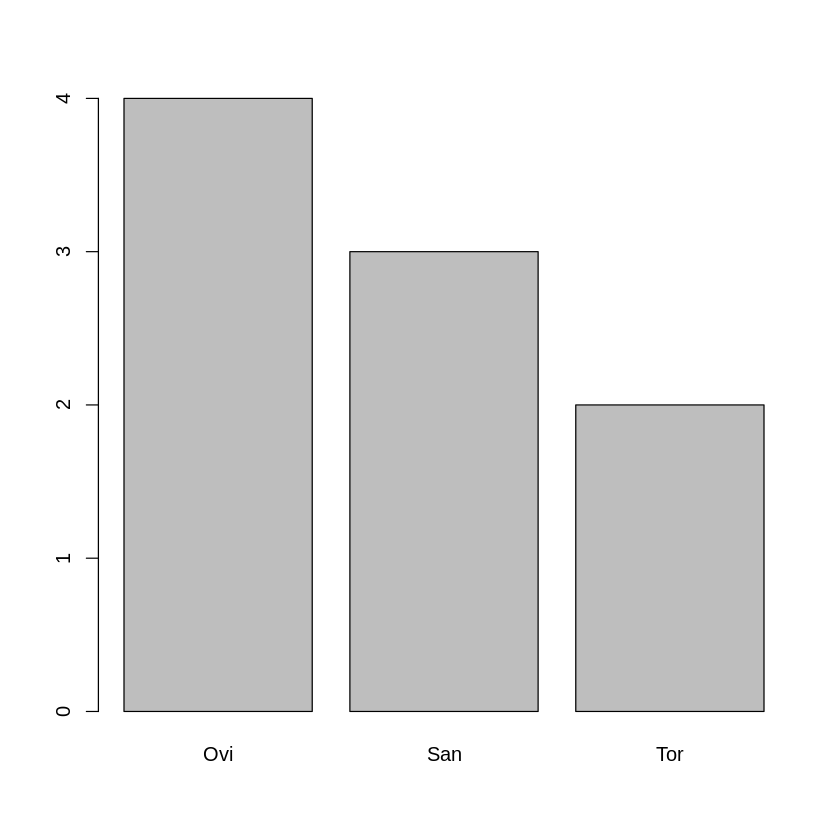

In [38]:
table(ciudadesf)
plot(ciudadesf)

---

__Ejercicio.__  
Crea a un vector 'Vec' que contenga 10 números enteros entre el 1 y el 5.  
Convierta 'Vec' a un factor 'Vecf'.  
Acceda a los distintos niveles.  
Haz una tabla de frequencias.

In [40]:
vect = rep(1:5, 2)
vectf = factor(vect)
levels(vectf)
table(vectf)

[1] "1" "2" "3" "4" "5"

vectf
1 2 3 4 5 
2 2 2 2 2 

### Listas
Una lista es una colección ordenada de objetos, donde se pueden agrupar objetos de diferentes tipos (por ejemplo una combinación de vectores, matrices, factores, otras listas, data.frames, etc.).  
La creación de una lista se hace mediante la función `list()`.

In [41]:
list1 <- list("Pedro", "Pelayo", 3, c(4,7,9))
list1

[[1]]
[1] "Pedro"

[[2]]
[1] "Pelayo"

[[3]]
[1] 3

[[4]]
[1] 4 7 9

Los elementos de la lista se pueden nombrar.

In [42]:
list2 <- list(nombre = "Pedro", apellido = "Pelayo", no.hijos = 3, edad.hijos = c(4,7,9))
list2

$nombre
[1] "Pedro"

$apellido
[1] "Pelayo"

$no.hijos
[1] 3

$edad.hijos
[1] 4 7 9

Selección de elementos de una lista.


In [43]:
list2[[1]]
list2$nombre
list2[[4]]
list2[[4]][1]

[1] "Pedro"

[1] "Pedro"

[1] 4 7 9

[1] 4

### Data frames
Un data frame se usa para guardar tablas de datos (creadas o importadas).  
* Un data frame es una lista de vectores de longitudes iguales.
  + lleva por defecto los atributos: `names`, `row.names`, `class`

Creación: la función `data.frame()`

In [44]:
edad <- c(22, 34, 29, 25, 30, 33, 31, 27, 25, 25)  # edad estudiantes
tiempo1 <- c(10.36, 14.21, 13.81, 11.89, 10.99, 12.03, 12.48, 13.37, 12.29, 11.92)  # primera carrera de 100 m.
tiempo2 <- c(11.38, 15.20, 14.91, 12.90, 12.03, 12.58, 13.00, 13.01, 14.54, 15.27)  # segunda carrera de 100 m.
sexo <- factor(c("M","H","H","M","M","H","M","M","H","H"))
df <- data.frame(edad,tiempo1,tiempo2,sexo)
df

edad,tiempo1,tiempo2,sexo
22,10.36,11.38,M
34,14.21,15.20,H
29,13.81,14.91,H
25,11.89,12.90,M
30,10.99,12.03,M
33,12.03,12.58,H
31,12.48,13.00,M
27,13.37,13.01,M
25,12.29,14.54,H
25,11.92,15.27,H


In [45]:
# Estructura del data frame
str(df)    

'data.frame':	10 obs. of  4 variables:
 $ edad   : num  22 34 29 25 30 33 31 27 25 25
 $ tiempo1: num  10.4 14.2 13.8 11.9 11 ...
 $ tiempo2: num  11.4 15.2 14.9 12.9 12 ...
 $ sexo   : Factor w/ 2 levels "H","M": 2 1 1 2 2 1 2 2 1 1


Se puede acceder a las columnas por su nombre y hacer operaciones con ellas de manera fácil.

In [48]:
df$totaltiempo <- df$tiempo1 + df$tiempo2
df

edad,tiempo1,tiempo2,sexo,totaltiempo
22,10.36,11.38,M,21.74
34,14.21,15.20,H,29.41
29,13.81,14.91,H,28.72
25,11.89,12.90,M,24.79
30,10.99,12.03,M,23.02
33,12.03,12.58,H,24.61
31,12.48,13.00,M,25.48
27,13.37,13.01,M,26.38
25,12.29,14.54,H,26.83
25,11.92,15.27,H,27.19


Existen funciones en R que operan directamente sobre data frames.  
Las funciones utlizan los nombres, reconocen factores, etc.

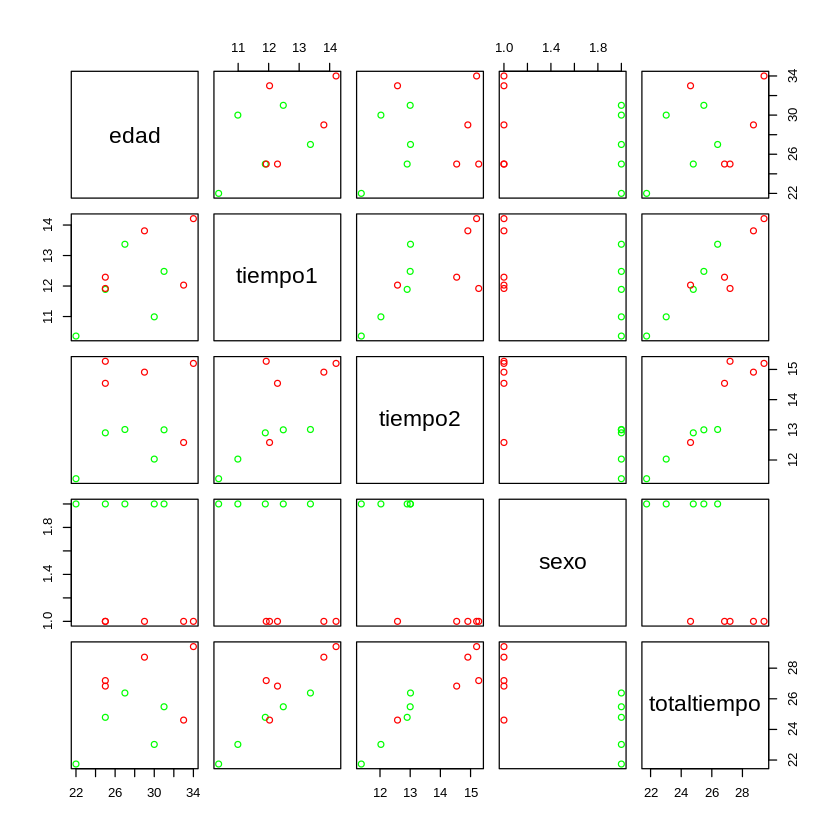

In [49]:
plot(df, col = c("red","green")[df$sexo]) # rojo = hombre, verde = mujer

---

__Ejercicio.__  
Añade una nueva columna con la media de los dos tiempos. 
Añade una nueva columna que indique si los estudiantes han probado el test: Media < 13.  
Dibuja la edad vs el tiempo.

   edad tiempo1 tiempo2 sexo totaltiempo mediaTiempos aprobado
1    22   10.36   11.38    M       21.74       10.870     TRUE
2    34   14.21   15.20    H       29.41       14.705    FALSE
3    29   13.81   14.91    H       28.72       14.360    FALSE
4    25   11.89   12.90    M       24.79       12.395     TRUE
5    30   10.99   12.03    M       23.02       11.510     TRUE
6    33   12.03   12.58    H       24.61       12.305     TRUE
7    31   12.48   13.00    M       25.48       12.740     TRUE
8    27   13.37   13.01    M       26.38       13.190    FALSE
9    25   12.29   14.54    H       26.83       13.415    FALSE
10   25   11.92   15.27    H       27.19       13.595    FALSE


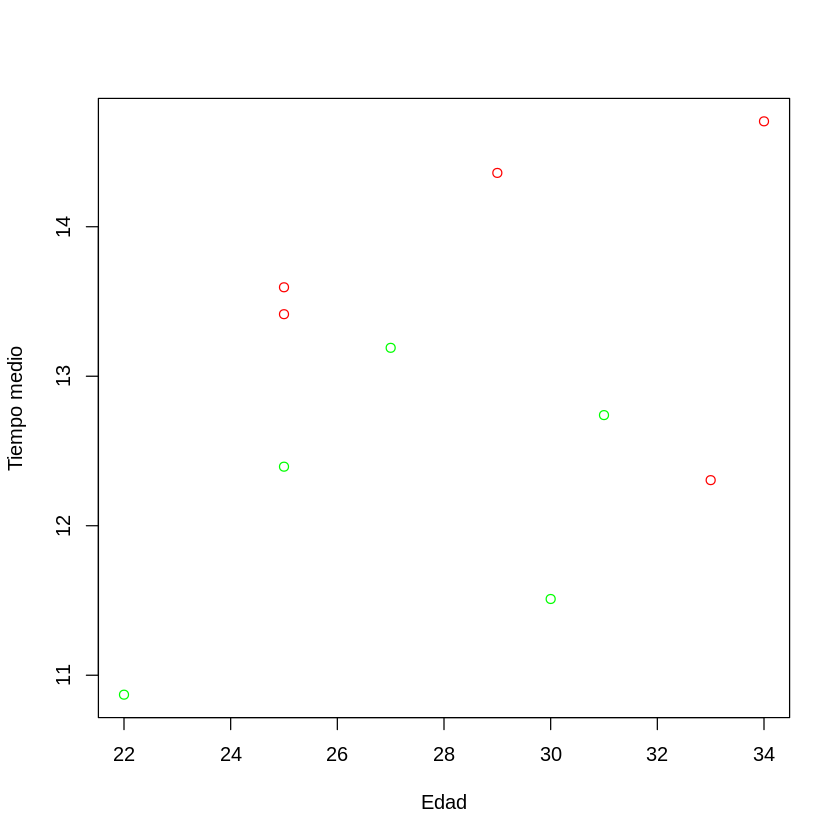

In [65]:
# Solución
df$mediaTiempos = (df$tiempo1 + df$tiempo2)/2
df$aprobado = df$mediaTiempos < 13
print(df)
plot(df$edad, df$mediaTiempos, col = c("red","green")[df$sexo], xlab = "Edad", ylab = "Tiempo medio")

---

Las bases de datos o datasets (por ejemplo en formato excel o csv) se importan en R como data frames para análisis posteriores. 
La librería `base` de R proporciona una serie de datasets de ejemplo (e.g. swiss)

In [1]:
data(swiss)
?swiss
str(swiss)

'data.frame':	47 obs. of  6 variables:
 $ Fertility       : num  80.2 83.1 92.5 85.8 76.9 76.1 83.8 92.4 82.4 82.9 ...
 $ Agriculture     : num  17 45.1 39.7 36.5 43.5 35.3 70.2 67.8 53.3 45.2 ...
 $ Examination     : int  15 6 5 12 17 9 16 14 12 16 ...
 $ Education       : int  12 9 5 7 15 7 7 8 7 13 ...
 $ Catholic        : num  9.96 84.84 93.4 33.77 5.16 ...
 $ Infant.Mortality: num  22.2 22.2 20.2 20.3 20.6 26.6 23.6 24.9 21 24.4 ...


---

__Ejercicio.__  
Utiliza este data frame (`swiss`) para aplicar las diferentes operaciones que hemos visto. Por ejemplo:
* Busca en la ayuda del data frame (`swiss`) el ejemplo en que se hace una regresión lineal. Copia ese ejemplo.
* Trata de explicar la relacion existente entre la "Education" y "Examination" con un plot o una regresión lineal entre las dos variables.
* Convierte la variable `catholic` del data frame `swiss` en una variable categórica (por ejemplo de tipo lógico con la condicion > 55 %). Posteriormente conviértela a factor. Haz una tabla de frequencias: ¿Como se ha dividido el país?
* Haz un nuevo data.frame `swiss2` que sólo contenga las columnas "Fertility", "Agriculture" e "Infant.Mortality". 
* Dibuja un scatterplot de `swiss2`


catf
FALSE  TRUE 
   30    17 

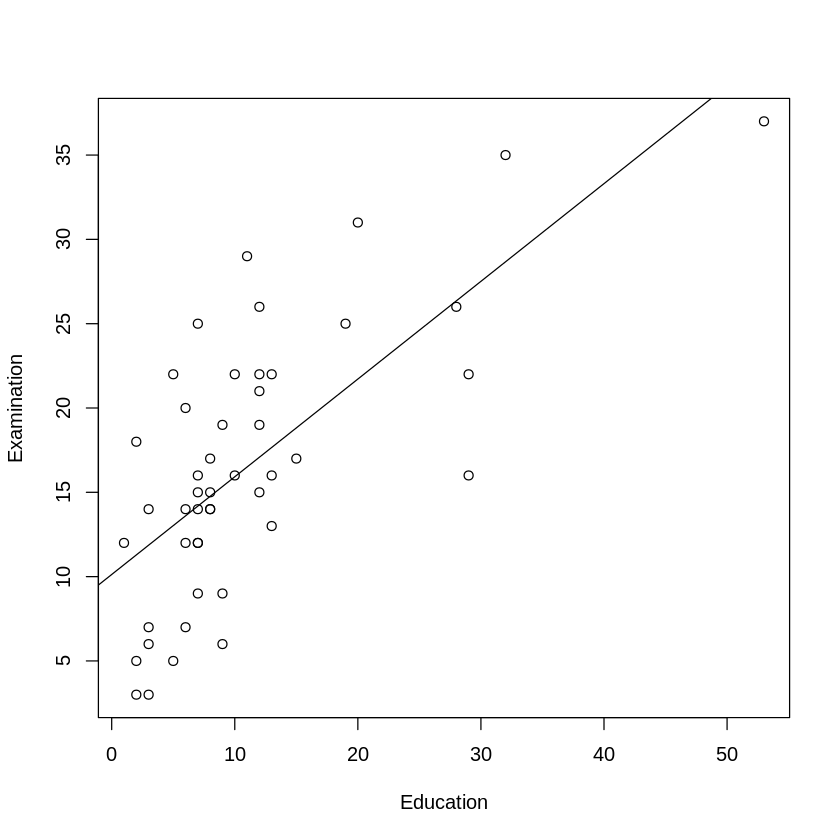

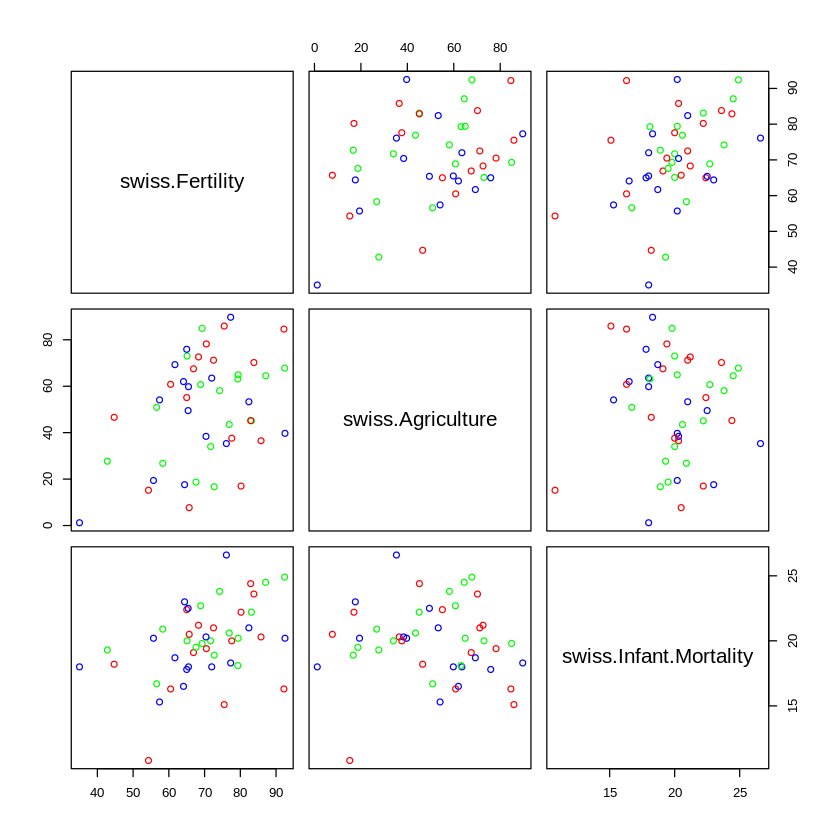

In [1]:
plot(swiss$Education, swiss$Examination, xlab = "Education", ylab = "Examination")
abline(lm(Examination ~ Education, data = swiss))
cat = swiss$Catholic > 55
catf = factor(cat)
table(catf)
swiss2 = data.frame(swiss$Fertility, swiss$Agriculture, swiss$Infant.Mortality)
plot(swiss2, col=c("red", "green", "blue"))

## Funciones en R
* Las funciones permiten realizar operaciones sobre objetos de una manera estructurada. La forma básica de definir una función (por ejemplo, llamada *function.name*) en R es la siguiente:

```{r}
function.name <- function(arg1, arg2, ..., argN) {
# statements
}
```
 
*arg1, ..., argN* son las variables y/o argumentos de entrada que necesita la función
    
    
* La forma de llamar a esta función sería tal que así:

```{r}
res <- function.name(arg1, arg2, ..., argN)
```
     
*res* es la variable de salida que devuelve la función como resultado de las operaciones hechas sobre las variables de entrada.

In [ ]:
# Es posible definir una función sin ninguna variable de entrada (aunque no tiene mucho sentido)
# Función "sin función"
hello <- function() {
 print("Hello world")
}
hello()

In [ ]:
# Ejemplo de función con dos variables de entrada
# Calcula la suma de dos números
fun.sum <- function(x, y) {
 return(x + y)
}
fun.sum(5, 7)

In [ ]:
# Cálculo del máximo y el mínimo de un vector
max.min <- function(x) {
 return(c(min(x), max(x)))
}
vec <- 1:100
max.min(vec)

### Ejercicio
Construye una función llamada *IMC* que calcule el *Indice de Masa Corporal* a partir del peso (en kg) y la altura (en m). 
IMC = peso/altura^2.

In [ ]:
peso = c(55, 63, 77, 82, 61, 75, 92)
altura = c(1.60, 1.73, 1.71, 1.75, 1.58, 1.72, 1.81)
# crea la función IMC

* Hay variables de entrada que son obligatorias y otras que son opcionales. Por ejemplo, la función *log* tiene una variable de entrada obligatoria (el número del cual se desea calcular el logaritmo) y otra opcional (si no se especifica lo contrario, se calcular el logaritmo natural, es decir, en base *e*).

In [ ]:
log(exp(1))
log(exp(1), base = 2)

In [ ]:
# Esta función, por ejemplo, admite un argumento de entrada opcional ("operator"), que puede tomar los valores "power" o "divide".
# Función para realizar operaciones (elevar al cuadrado o dividir) sobre dos números
operate.2num = function(x, y, operator = NULL) {
    if (is.null(operator)) {
        return(c(x, y))
    } else if (operator == "power") {
        return(x^y)
    } else if (operator == "divide") {
        return(x/y)
    }
}
operate.2num(10, 2)
operate.2num(10, 2, "power")
operate.2num(10, 2, "divide")

### Ejercicio
Modifica la función anterior (*operate.2num*) para que:
1. permita también calcular el logaritmo de "x" en base "y"
2. en el caso de la operación "power" sea el mayor de los dos números el que se eleve al menor

In [ ]:
# Modificación de la función "operate.2num"

* La ayuda de una función en R se puede obtener mediante los comandos `?` y `help()`, y se estructura en varias secciones:
   +  **Description**: breve descripción de lo que hace la función.  
   +  **Usage**: sintaxis de la función.
   +  **Arguments**: explicación de los argumentos que recibe la función.
   +  **Value**: explicación del objeto que devuelve la función. El objeto devuelto puede ser un valor, una lista, una matriz, …
   +  **References**: bibliografía relacionada con los métodos implementados en la función.
   +  **See Also**: funciones relacionadas.
   +  **Examples**: esta es sin duda la sección más importante ya que muestra ejemplos efectivos del uso de la función.

In [ ]:
?mean()
help(mean)

* Si queremos utilizar una función que no recordamos (o no conocemos), pero de la que sabemos (o sospechamos) que su nombre contiene el término *mean*, podemos utilizar *apropos("mean")*, que nos devuelve un listado de funciones que contienen dicho témino en su nombre.

In [ ]:
apropos("mean")

## Librerías en R

* La instalación básica de R viene equipada con múltiples funciones para análisis estadístico, importación de datos, gráficos, etc. Sin embargo, puede ocurrir que necesitemos llevar a cabo un análisis muy específico para el cual no encontremos las funciones adecuadas. En ese caso, la gran ventaja de R radica en que, en la práctica, casi siempre será posible encontrar un paquete (ó librería) que ya haya sido diseñado para el fin que perseguimos.
* Un paquete es una colección de funciones y/o datos con un propósito concreto (normalmente bastante específico) que se almacenan en una carpeta conforme a una estructura bien definida, fácilmente entendible por R.
* En la web de R se puede consultar la lista de paquetes disponibles (actualmente, más de 13000): https://cran.r-project.org/web/packages/. En la sección Task Views (https://cran.r-project.org/web/views/) se puede consultar una lista de paquetes ordenada según áreas de aplicación.
* El comando *library()* abre una ventana con información sobre los paquetes instalados en R. 

In [ ]:
library()

* Podemos ver un listado completo de los paquetes actualmente cargados en memoria con el comando `search()`. 

In [ ]:
search()

* Para poder usar un paquete es necesario instalarlo y después cargarlo en memoria (comando `library`).
  
 + Instalación de librerías:
     + CRAN 
     + GitHub (hay que instalar antes el paquete "devtools")
     + local

In [ ]:
## installing from CRAN ##
# R.matlab package (https://cran.r-project.org/web/packages/R.matlab/index.html). 
# R.matlab provides methods for controlling MATLAB via R and sending and retrieving data between R and MATLAB.
install.packages("R.matlab")

# La primera vez que se instale un paquete, R  preguntará el país desde dónde se desea descargar
# (es aconsejable hacerlo desde un mirror español). 

# Una vez instalado no se necesitará instalarlo más, pero hay que cargarlo en memoria para poder usarlo
library(R.matlab)
existsFunction("writeMat")

In [ ]:
# https://cran.r-project.org/web/packages/devtools/index.html
install.packages("devtools")
library(devtools)

## installing from GitHub ##
install_github("HenrikBengtsson/R.matlab@develop")
library(R.matlab)

In [ ]:
## instalación local de un paquete comprimido
install.packages("./pathLocal/paquete.tar.gz", repos = NULL, type = "source")
library(paquete)

* En ocasiones se hace necesario eliminar de la memoria algún paquete que hemos cargado previamente (por ejemplo, porque deseamos cargar una versión que acabamos de actualizar). Para ello basta con ejecutar el comando *detach*

In [ ]:
detach("package:R.matlab")
# comprueba si existe la función especificada
existsFunction("writeMat") 

* Si queremos eliminar físicamente del disco duro un paquete que tengamos instalado, basta ejecutar la función *remove.packages*

In [ ]:
remove.packages("R.matlab")

* Para ver un listado de todos los paquetes que tenemos en nuestro ordenador que pueden ser actualizados

In [ ]:
old.packages()

* Para actualizar dichos paquetes

In [ ]:
update.packages()

* Finalmente, podemos querer cargar una función que hayamos creado nosotros mismos o nos hayamos descargado en local, pero que no sea una librería. Para ello tenemos que usar el comando `source`. El problema de este comando es que hay que volver a aplicarlo siempre que hagamos un cambio en la funcion que queramos utilizar.

In [ ]:
source("/home/jovyan/R/show.name.R")
show.name("Rodrigo")

## RStudio
* RStudio es un IDE (*Integrated Development Environment*, o Entorno de Desarrollo Integrado) de código abierto que permite interactuar con R de manera muy simple. Por decirlo de una manera gráfica, R será nuestro motor para el análisis de datos y Rstudio la carrocería que nos va a permitir manejar cómodamente toda la potencia del motor.
* Entre otras ventajas, Rstudio utiliza diferentes colores para las distintas clases de objetos de R, permite autocompletar código (tecla tabulador), incluye un sistema de menús de ayuda muy completo, cuenta con un potente sistema para la gestión, descarga y construcción de librerías, dispone de un depurador de código que detecta posibles errores de sintaxis, es multiplataforma (existen versiones para Windows, Linux y Mac)...
* Instalación: 
http://www.rstudio.com/
* Por defecto, RStudio tiene cuatro paneles principales (la interfaz puede modificarse en *Tools → Options → PaneLayout*). 
   + El panel inferior izquierdo es una consola de R. En ella se puede escribir y ejecutar código. 
   + El panel superior izquierdo es un editor de código. Los ficheros que se abran y se editen irán apareciendo en distintas pestañas.
   + Los paneles de la derecha son menos importantes. 
      + El superior contiene un listado de las variables en el entorno y un histórico de comandos ejecutados. 
      + De entre todas las pestañas que aparecen en el inferior, las más usadas generalmente son:
        + Files: da acceso al sistema de ficheros del disco duro.
        + Plots: aloja los gráficos que cree R.
        + Help: muestra la página de ayuda de las funciones cuando la solicite el usuario.             
* Permite la creación de proyectos e integra funcionalidades git.
